# XSVS analysis for TbCo data

for this analysis used functions in modules https://github.com/scikit-xray/scikit-xray/blob/master/skxray/core/speckle.py and
https://github.com/scikit-xray/scikit-xray/blob/master/skxray/core/roi.py

In [1]:
import skxray.core.speckle as speckle
import skxray.core.roi as roi
import skxray.core.utils as utils

import xray_vision.mpl_plotting as mpl_plot
import xray_vision.mpl_plotting.speckle as speckle_plot

import numpy as np
import os, sys

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.axes_grid import ImageGrid

# Easily switch between interactive and static matplotlib plots
interactive_mode = True

if interactive_mode:
    %matplotlib notebook
else:
    %matplotlib inline

#backend = mpl.get_backend()
cmap = "Dark2"

## Data Directory

In [2]:
data_dir = "/Volumes/Data/BeamLines/CSX_Data/X_data/"

X_data = np.load(data_dir+"TbCO_speckle_visibility.npy")
X_data.shape

(230, 230)

## mask

<IPython.core.display.Javascript object>


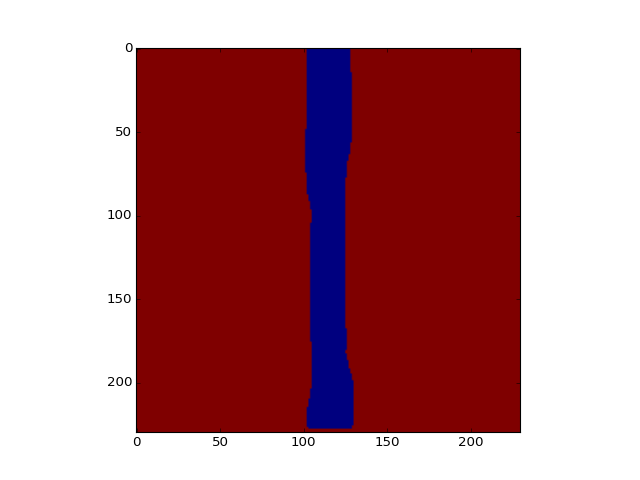

In [4]:
mask = ~np.load(data_dir+"Tbco_mask.npy")
plt.figure()
plt.imshow(mask)
plt.show()

<IPython.core.display.Javascript object>


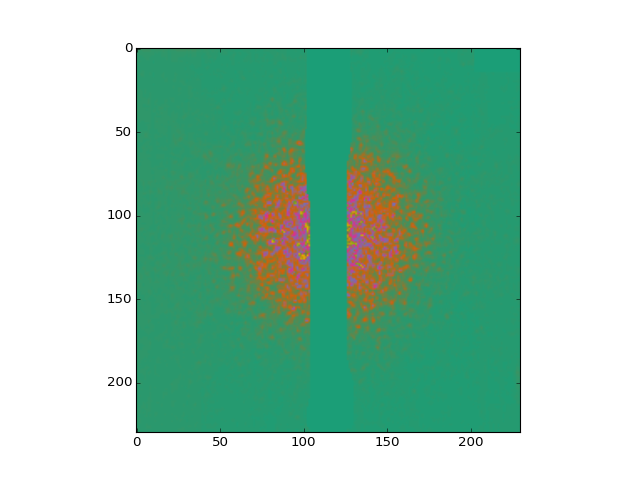

In [5]:
plt.figure()
plt.imshow(X_data*mask, cmap=cmap)
plt.show()

In [6]:
inner_radius = 20
width = 1
spacing = 2
num_rings = 3

#  create edges of the rings using roi.ring_edges
edges = roi.ring_edges(inner_radius, width, spacing, num_rings)
edges

array([[ 20.,  21.],
       [ 23.,  24.],
       [ 26.,  27.]])

<IPython.core.display.Javascript object>


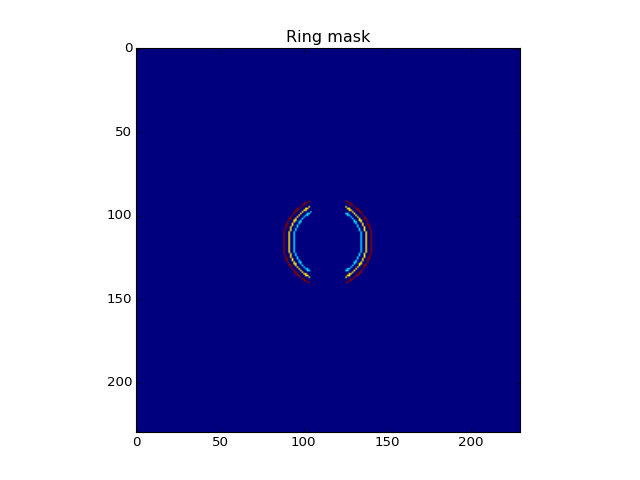

In [8]:
center = (116, 114)
rings = roi.rings(edges, center, X_data.shape)

rings_mask = rings*mask

plt.figure()
plt.imshow(rings_mask)
plt.title("Ring mask")
plt.show()

<IPython.core.display.Javascript object>


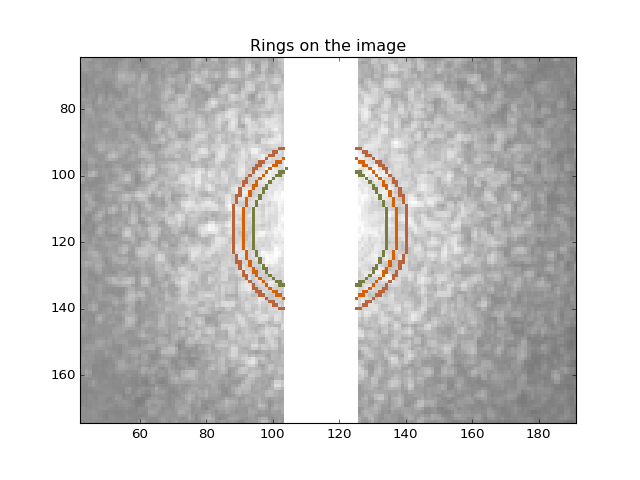

In [9]:
fig, ax = plt.subplots()
im, im_lbel = mpl_plot.roi.show_label_array_on_image(ax, X_data, rings_mask, cmap='Dark2')
plt.title("Rings on the image")
plt.show()

##  get the max_cts or brightest pixel in the image

In [11]:
#  divide the data_array by 36 (Vivek suggested)
max_cts = roi.roi_max_counts(X_data/36, rings_mask)
max_cts

184.41712618424771

In [19]:
roi_pix, index = roi.roi_pixel_values(X_data/36, rings_mask, index=None)


array([ 54.07472368,  49.98114166,  44.04222815])

In [21]:
X_data1 = (X_data/36).reshape(1, 230, 230)

## get the mean intensities

In [23]:
mean_int_rings, index = roi.mean_intensity(X_data1, rings_mask, index=None)
mean_int_rings


array([[ 54.07472368,  49.98114166,  44.04222815]])

<IPython.core.display.Javascript object>


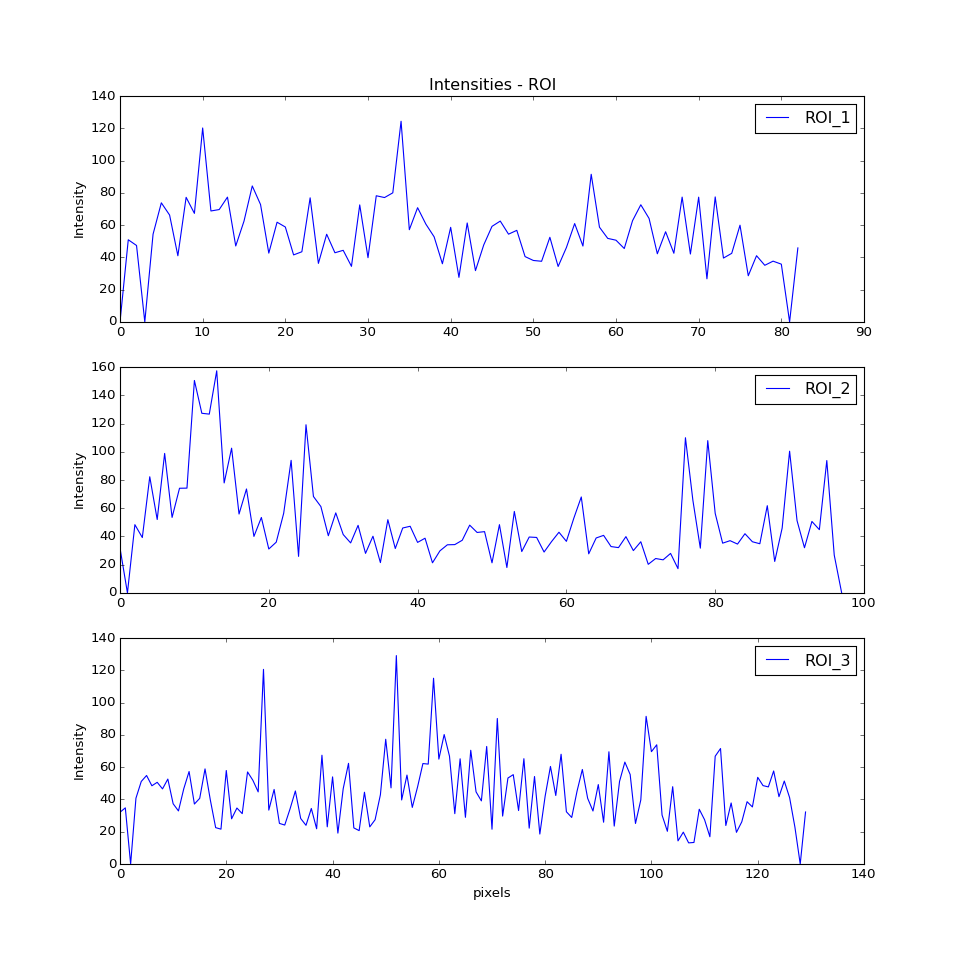

In [26]:
fig, ax = plt.subplots(3, figsize=(12, 12))
speckle_plot.rois_as_lines(ax, roi_pix)
plt.show()

###  xsvs analysis ( using skxray.core.speckle module 
### https://github.com/scikit-xray/scikit-xray/blob/master/skxray/core/speckle.py)

In [25]:
p_k, std_dev = speckle.xsvs((X_data1, ), rings_mask, timebin_num=2,
                             number_of_img=3, max_cts=160)

In [27]:
num_times = 2
num_rois = num_rings
norm_bin_edges, norm_bin_centers = speckle.normalize_bin_edges(num_times,
                                                            num_rois, mean_int_ring, max_cts=160)

## Plots for the first time step?, for 3 ROI's

<IPython.core.display.Javascript object>


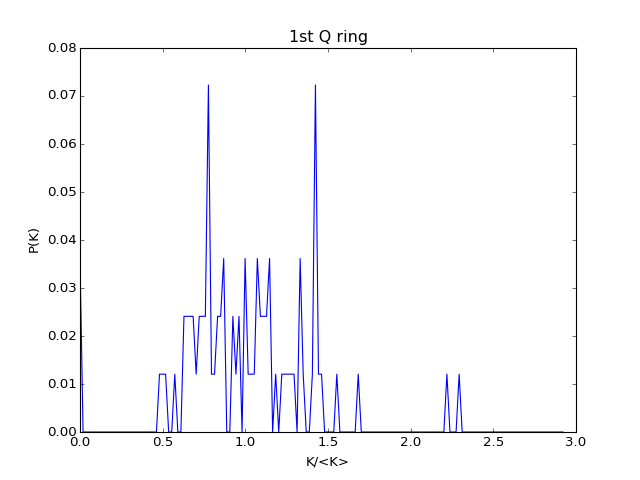

In [29]:
plt.figure()
plt.plot(norm_bin_edges[0, 0][:-1],p_k[0, 0])
plt.title("1st Q ring")
plt.xlabel("K/<K>")
plt.ylabel("P(K)")
plt.show()

<IPython.core.display.Javascript object>


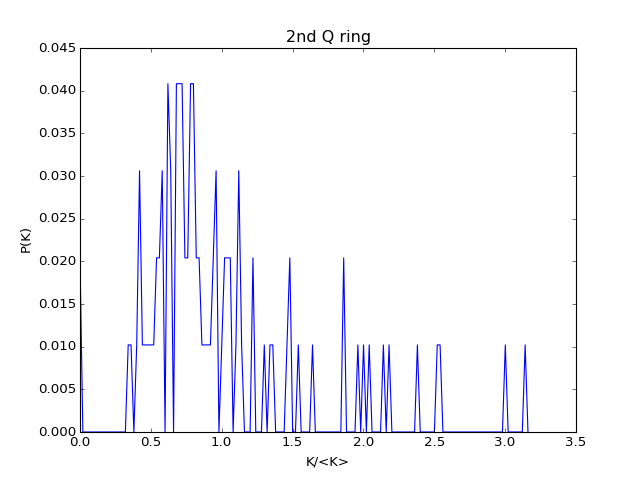

In [30]:
plt.figure()
plt.plot(norm_bin_edges[0, 1][:-1], p_k[0, 1])
plt.title("2nd Q ring")
plt.xlabel("K/<K>")
plt.ylabel("P(K)")
plt.show()

<IPython.core.display.Javascript object>


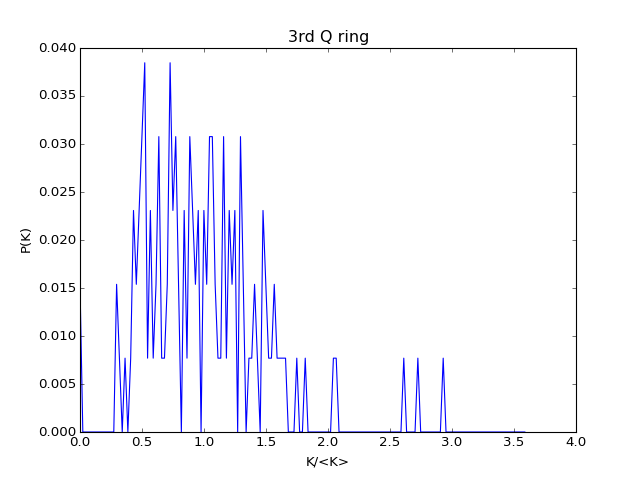

In [31]:
plt.figure()
plt.plot(norm_bin_edges[0, 2][:-1], p_k[0, 2])
plt.title("3rd Q ring")
plt.xlabel("K/<K>")
plt.ylabel("P(K)")
plt.show()